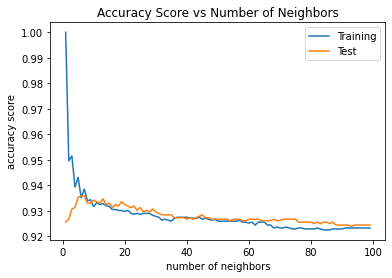

5
0.9358533791523482
0.9358533791523482


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mpl
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


df = pd.read_csv('../train_cleaned.csv')
y = df['Revenue']

X = df.drop(columns=['Revenue', 'Month', 'VisitorType', 'Weekend', 'id'])
X = X.fillna(value=0)

scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify=y, random_state=1234)

ks = np.arange(1, 100)
accuracy_training = []
accuracy_test = []

for k in ks:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    accuracy_training.append(model_knn.score(X_train, y_train))
    accuracy_test.append(model_knn.score(X_test, y_test))

plt.plot(ks, accuracy_training)
plt.plot(ks, accuracy_test)
plt.legend(['Training', 'Test'])
plt.xlabel('number of neighbors')
plt.ylabel('accuracy score')
plt.title('Accuracy Score vs Number of Neighbors')
plt.show()

hi_k_test = accuracy_test.index(max(accuracy_test))
print(hi_k_test)  ## Index (Index + 1 = # of Ks to use)
print(max(accuracy_test))  ## Highest real value

model_knn_final = KNeighborsClassifier(n_neighbors=6)
model_knn_final.fit(X_train, y_train)
y_pred = model_knn_final.predict(X_test)

print(model_knn_final.score(X_test, y_test))


In [3]:
testFilePath = "../test_cleaned.csv"
trainFilePath = "../train_cleaned.csv"
validationFilePath = "../validation_cleaned.csv"

# Open as pd dataframe
train = pd.read_csv(trainFilePath)
test = pd.read_csv(testFilePath)
validation = pd.read_csv(validationFilePath)

train.dropna(how = "any", inplace=True)
test.dropna(how = "any", inplace=True)
validation.dropna(how = "any", inplace=True)

trainY = train["Revenue"].to_numpy()
trainX = train.drop(columns=["Revenue"]).to_numpy()

testY = test["Revenue"].to_numpy()
testX = test.drop(columns=["Revenue"]).to_numpy()


# GREEDY COLUMN OPTIMIZATION FOR BOOSTING
# Tries each column in isolation, picks the best one. Then tries to add a column by doing the same


columns = list(train.drop(columns=["Revenue"]).columns)

# Optimisation by adding just one feature at a time
scores = [0]
finalScores = []
prevScore = -1
currColumns = []
availableColumns = columns[1:]
while max(scores) > prevScore:
    prevScore = max(scores)
    scores = []
    for i in range(len(availableColumns)):
        useColumns = currColumns.copy()
        useColumns.append(availableColumns[i])

        trainX = train.loc[:, useColumns].to_numpy()

        clf = KNeighborsClassifier(n_neighbors=6).fit(trainX, trainY)

        testX = test.loc[:, useColumns].to_numpy()
        scores.append(clf.score(testX, testY))
        print("For columns: " + str(useColumns) + " score: " + str(scores[-1]))

    # ADD THE BEST COLUMN
    # get index of max
    maxIndex = scores.index(max(scores))
    # add column to currColumns
    currColumns.append(availableColumns[maxIndex])
    print("Selected column " + str(availableColumns[maxIndex]))

    # remove column from availableColumns
    availableColumns.remove(availableColumns[maxIndex])
    finalScores.append(scores)


# OUTPUT ---> COLUMNS PICKED ARE : ['PageValues', 'ProductRelated_Duration', 'BounceRates', 'Month', 'TrafficType']

For columns: ['Administrative'] score: 0.8478403141361257
For columns: ['Administrative_Duration'] score: 0.8462041884816754
For columns: ['Informational'] score: 0.8478403141361257
For columns: ['Informational_Duration'] score: 0.8435863874345549
For columns: ['ProductRelated'] score: 0.8478403141361257
For columns: ['ProductRelated_Duration'] score: 0.8416230366492147
For columns: ['BounceRates'] score: 0.8468586387434555
For columns: ['ExitRates'] score: 0.8452225130890052
For columns: ['PageValues'] score: 0.8720549738219895
For columns: ['SpecialDay'] score: 0.8478403141361257
For columns: ['Month'] score: 0.8478403141361257
For columns: ['OperatingSystems'] score: 0.8478403141361257
For columns: ['Browser'] score: 0.8478403141361257
For columns: ['Region'] score: 0.8478403141361257
For columns: ['TrafficType'] score: 0.8478403141361257
For columns: ['VisitorType'] score: 0.8478403141361257
For columns: ['Weekend'] score: 0.8478403141361257
Selected column PageValues
For columns: 